ML: is a set of tools and techniques which allow to find patterns in data

- We can do Deep learning with Convolutional Neural Network (CNN)
- CNN is a DL algorithm that work better for image classification due to the ability to learn automatically features from images in a hierachical fashion (i.e each layer builds upon what was learned by the previous layer)
- Image classification is a fundamental taks in computer vision
- Many practical applications of image classification are:
    1. Object Recognition: identifying objects within images, such as cars, animals, or household items
    2. Medical Imaging: diagnosing diseases from medical images like X-rays or MRIs
    3. Quality Control: inspecting products for defects on manufacturing lines
    4. Autonomous Vehicles: identifying pedestrians, traffic signs, and other vehichles in self-driving cars
    5. Security and Surveillance: detecting anomalies or unauthorised objects in security footage



### Deep learning workflow
**step1: Outline the problem**
    - example: image classification so the aim is to put an image into one of a few categories. 
    - We can use CIFAR-10 dataset and have 10 categories: airplane, automobile, bird,cat, deer, dog, frog, horse, ship, truck
    
**step2: Identify inputs and outputs**
    - example: the data is images and the inputs could be the individual pixels of the images
    - the output will be one for each potential class
**step3: Prepare data **
    - neural networks only deal with numerical data, hence non-numerical data (e.g., images) will need to be converted to numerical data
    - normalize the imae pixel values to be between 0 and 1
    - one-hot encode the training image labels 
    - divide the data into training, validation and test subsets
    
**step4: Choose a pre-trained model or build a new architecture from scratch**
    - design the model from scratch, we need to think about how many input neurons to use, how many hidden layers and how many outputs, and what types of layers to use.
    
**step5: Choose a loss function and optimizer and compile the model**
    - compile the model is how to set up the rules and strategies for how the network is going to learn
    - loss function: tells the training algorithm how far away the predicted value was from the true value
    - optimizer: is used for taking the output of the loss function and then applying some changes to the weights within the network. It is through this process that 'learning' (adjustment of the weights) is achieved
    
**step6: Train the model**
    - training the model for a given number of iterations (epochs) through the training dataset or until the loss function gives a value under a certain threshold
    
**step7: Perform a prediction/classification**
    - after training the network, we use it to perform prediction on a special hold-out set
    - make sure the data used to test are prepared the same way as the training data
    
**step8: Measure performance**
    - using the test dataset to find our well the model performs.
    
**step9: Tune Hyperparameters**
    - when using libraries like TensorFlow or Keras, the process also is selecting the best values for various hyperparameters that govern the training process.
    - Hyperparameters: are all the parameters set by the person configuring the model as opposed to those learned by the algorithm itself. Includes: learning rate, number of layers in the network, number of neurons per layer, etc.
    - Hyperparameter tuning is the process of systematically searching for the best combination of hyperparameters that will optimise the model's performance.
    
**step10: Share the model** 
    - if our model is from scratch, we can allow others to use it as a pre-trained network and for them to reproduce our result
    - we must save the model in order to share it

In [7]:
# load needed packages
from tensorflow import keras 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2024-11-09 22:31:36.056427: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-09 22:31:36.057642: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-09 22:31:36.120928: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-09 22:31:36.401761: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-09 22:31:37.310368: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [4]:
# function to prepare the training dataset
def prepare_dataset(train_images, train_labels):

    # normalize the RGB values to be between 0 and 1
    train_images = train_images / 255.0

    # one-hot encode the training labels
    train_labels = keras.utils.to_categorical(train_labels, len(class_names))

    # split the training data into train and validation set
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=0.2, random_state=42
    )

    return train_images, val_images, train_labels, val_labels


In [5]:
# load the data 
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# create a list of class names 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

#### step 3, prepare the data
# prepare the dataset for training
train_images, val_images, train_labels, val_labels = prepare_dataset(train_images, train_labels)

In [6]:
print('Train: Images=%s, Labels=%s' % (train_images.shape, train_labels.shape))
print('Validate: Images=%s, Labels=%s' % (val_images.shape, val_labels.shape))
print('Test: Images=%s, Labels=%s' % (test_images.shape, test_labels.shape))

Train: Images=(40000, 32, 32, 3), Labels=(40000, 10)
Validate: Images=(10000, 32, 32, 3), Labels=(10000, 10)
Test: Images=(10000, 32, 32, 3), Labels=(10000, 1)


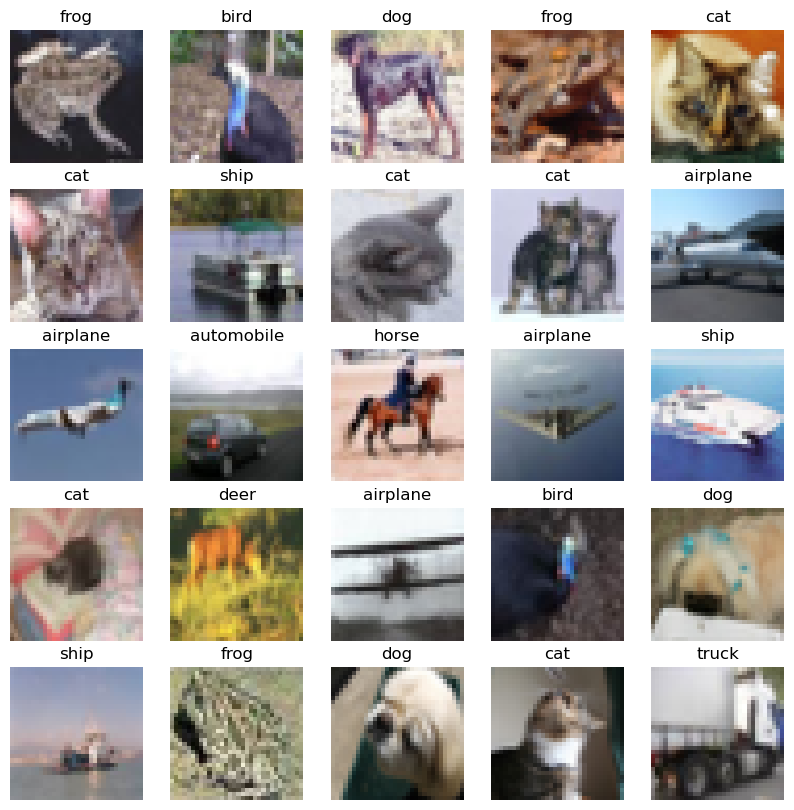

In [16]:
# visualize a subset of the CIFAR-10 dataset
# set up plot region
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,10))

# add images to plot
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i])
    ax.axis('off')
    ax.set_title(class_names[train_labels[i,].argmax()])

# view plot
plt.show()

In [17]:
train_images.shape[1:]

(32, 32, 3)

In [18]:
# define the model 
def create_model_intro():

    # CNN Part1
    # input layer of 32x32 images with three channels (RGB)
    inputs_intro = keras.Input(shape=train_images.shape[1:])

    # CNN Part2
    # conv layer with 16 filters, 3x3 kernel size, ReLU activation 
    x_intro = keras.layers.Conv2D(filters=16,kernel_size=(3,3), activation='relu')(inputs_intro)
    # pooling layer with input window size 2x2
    x_intro = keras.layers.MaxPooling2D(pool_size=(2,2))(x_intro)
    # second conv layer with 32 filters, 3x3 kernel size, ReLU activation
    x_intro = keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu')(x_intro)
    # second pooling layer with input window sized 2x2
    x_intro = keras.layers.MaxPooling2D(pool_size=(2,2))(x_intro)
    # Flatten layer to convert 2D feature maps into a 1D vector
    x_intro = keras.layers.Flatten()(x_intro)
    # Dense layer with 64 neurons and ReLU activation
    x_intro = keras.layers.Dense(units=64, activation='relu')(x_intro)

    # CNN Part3
    # output layer with 10 units (one for each class) and softmax activation
    outputs_intro = keras.layers.Dense(units=10, activation='softmax')(x_intro)

    # create the model 
    model_intro = keras.Model(inputs=inputs_intro, 
                              outputs=outputs_intro, 
                             name='cifar_model_intro')
    return model_intro

In [19]:
# create the introduction model
model_intro = create_model_intro()

# view model summary
model_intro.summary()

Model: "cifar_model_intro"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,530 (310.66 KB)

 Trainable params: 79,530 (310.66 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# compile the model
model_intro.compile(optimizer=keras.optimizers.Adam(),
                   loss=keras.losses.CategoricalCrossentropy(),
                   metrics=[keras.metrics.CategoricalAccuracy()])

In [22]:
# fit the model
history_intro = model_intro.fit(x=train_images, y=train_labels,
                               batch_size=32, epochs=10,
                               validation_data=(val_images,val_labels))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.3552 - loss: 1.7684 - val_categorical_accuracy: 0.5215 - val_loss: 1.3464
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.5627 - loss: 1.2491 - val_categorical_accuracy: 0.6045 - val_loss: 1.1505
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.6101 - loss: 1.1117 - val_categorical_accuracy: 0.6198 - val_loss: 1.0991
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.6425 - loss: 1.0232 - val_categorical_accuracy: 0.6236 - val_loss: 1.0742
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.6648 - loss: 0.9638 - val_categorical_accuracy: 0.6492 - val_loss: 1.0028
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.6864 - loss: 0.9019 - val_categorical_accuracy: 0.6350 - val_loss: 1.0529
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy

- epoch: describes the number of full passes over all training data
    - there are 1250 batches (steps) to complete each epoch
    - calculated from the number of images as input/batch size (40000/32)
- loss: the model try to minimise this value, an error between the true label of an image and the model prediction.
    - minimising this distance is where *learning* occurs to adjust weights and bias which reduce loss
- val_loss: a value calculated against the validation data and is a measure of the model's performance against unseen data
    - both values are a summation of errors made during each epoch
- accuracy and val_accuracy values are a percentage and are only relevant to classification problems
    - val_accuracy score: used to communicate a model's effectiveness on unseen data

In [23]:
# perform a prediction 
# normalize test dataset RGB values to be between 0 and 1
test_images = test_images / 255.0

# make prediction for the first test image
result_intro = model_intro.predict(test_images[0].reshape(1,32,32,3))
print(result_intro)

# extract class with highest probability
print(class_names[result_intro.argmax()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[1.7480578e-03 1.7936509e-03 4.9281478e-02 7.6010466e-01 2.1132813e-03
  1.6154148e-01 1.6421527e-02 2.3958880e-04 6.4971088e-03 2.5917587e-04]]
cat


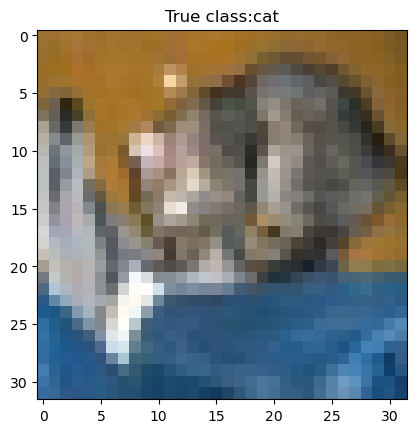

In [27]:
# plot the first test image with its real label

# create a plot
plt.figure()

# display image
plt.imshow(test_images[0])
plt.title('True class:' + class_names[result_intro.argmax()])

# view plot
plt.show()

- Training the model for more epochs (longer time) and using a deeper model (more layers) helps it learn better and give more accurate predictions
- The model learned well and its performance doesn't change much with more training, we say it has *converged*
- **Convergence** refers to the point where the model has reached an optimal or near-optimal state in terms of learning from the training data
- getting a different answer if you run the model again. Although the neural network itself is deterministic (ie without randomness), vairous factors in the training process, system setup, and hardware configurations can lead to small variations in the output
- Improving the accuracy of the model can be done by adding or removing layers and fine-tuning the hyperparameters

In [38]:
# save the model
model_intro.save('fit_outputs/model_intro.keras')

#### Data preprocessing
Various tasks to enhance the quality and consistency of the data:
    
- **Resizing**: resize images to a consistent resolution to ensure uniformity and reduce computational load
- **Augmentation**: apply random transformations (e.g. rotations, shifts, flips) to create new variations of the same image. Improve the robustness and generalisation of the model by exposing to more diverse data
- **Normalization**: scale pixel value to a common range, often between 0 and 1 or -1 and 1. It helps the model to converge faster during training
- **Label encoding**: approach used to represent categorical data with numerical labels
- **Data splitting**: split the data set into seprate parts to have one for training, for evaluating during training, and one reserved for the final evaluation of the model's performance


**Pixels**
- images in a computer are stored as rectangular arrays of hundreds, thousands or millions of discrete 'picture elements' known as pixels
- Each pixel can be thought as a single square point of coloured light
- in Python, an image can be represented as a 2- or 3-dimensional array
- **Array** is used to store multiple values or elements of the same datatype in a single variable
- In the context of images, arrays have dimensions for height, width, and colour channels (if applicable) and each element corresponds to a pixel value in the image

In [39]:
# specify the image path
new_img_path = 'data/Jabiru_TGS.JPG'

# read in the image with default arguments
new_img_pil = keras.utils.load_img(path=new_img_path)

# check the image class and size
print('Image class:', new_img_pil.__class__)
print('Image size:', new_img_pil.size)

Image class: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Image size: (552, 573)


In [40]:
# read in the image and specify the target size
new_img_pil_small = keras.utils.load_img(path=new_img_path, target_size=(32,32))

# confirm the image class and size
print('Resized image class :', new_img_pil_small.__class__)
print('Resized image size', new_img_pil_small.size) 

Resized image class : <class 'PIL.Image.Image'>
Resized image size (32, 32)


Image augmentation
- several ways used to augment data to increase the diversity of the training data and improve model robustness
- Geometric transformations: rotation, scaling, zooming, cropping
- Flipping or mirroring: some classes, like horse, have a different shape when facing left or right and we want our model to recognize both
- Colour properties: brightness, contrast, or hue. This changes simulate variations in lighting conditions

Normalization
- Image RGB values are between 0 and 255. As input for neural networks, it is better to have small input values.
- The process of converting the RGB values to be between 0 an 1 is called **normalization**
- the image need to be in numpy array before applying normalization


In [41]:
# first convert the image into an array for normalization
new_img_arr = keras.utils.img_to_array(new_img_pil_small)

# confirm the image class and shape
print('Converted image class  :', new_img_arr.__class__)
print('Converted image shape', new_img_arr.shape)

Converted image class  : <class 'numpy.ndarray'>
Converted image shape (32, 32, 3)


In [43]:
# inspect pixel values before and after normalization

# extract the min, max and mean pixel values BEFORE
print('BEFORE normalization')
print('Min pixel value ', new_img_arr.min())
print('Max pixel value ', new_img_arr.max())
print('Mean pixel value ', new_img_arr.mean().round())

# normalize the RGB values to be between 0 and 1
new_img_arr_norm = new_img_arr / 255.0

# extract the min, max and mean pixel values AFTER
print('AFTER normalization')
print('Min pixel value ', new_img_arr_norm.min())
print('Max pixel value ', new_img_arr_norm.max())
print('Mean pixel value ', new_img_arr_norm.mean().round())

BEFORE normalization
Min pixel value  0.0
Max pixel value  255.0
Mean pixel value  87.0
AFTER normalization
Min pixel value  0.0
Max pixel value  1.0
Mean pixel value  0.0


One-hot encoding
- is a technique to represent categorical data as binary vectors, making compatible with ML algorithms
- keras.utils.to_categorical(y, num_classes=None, dtype='float32')
    - y: is an array of class values to be converted into a matrix
    - num_classes: is the total number of classes. If None, this would be inferred as max(y)+1
    - dtype: is the data type expected by the input. Default: 'float32'

Splitting data
- sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
- first two parameters are the dataset (X) and the corresponding targets (y)
- test_size: is the fraction of the dataset used for testing
- random_state: controls the shuffling of the dataset, setting this value will reproduce the same results every time it is called
- shuffle: controls whether the order of the rows of the dataset is shuffled before splitting and can be either True or False
- stratify: controls how the split is done

Pre-existing image data
- MNIST dataset: 60,000 training images of handwritten digits (0-9)
- ImageNet: 14 million hand-annotated images indicating objects from more than 20,000 categories.
- MS COCO: more than 200,000 labelled images used for object detection, instance segmentation, keypoint analysis and captioning

In [5]:
# function to prepare the training dataset
def prepare_dataset(train_images, train_labels):

    # normalize the RGB values to be between 0 and 1
    train_images = train_images / 255.0

    # one-hot encode the training labels
    train_labels = keras.utils.to_categorical(train_labels, len(class_names))

    # split the training data into training and validation set
    train_images, val_images, train_labels, val_labels = train_test_split(train_images,train_labels,test_size=0.2,random_state=42)

    return train_images,val_images,train_labels,val_labels

In [8]:
# load the data 
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# create a list of class names 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [9]:
# inspect the labels before and after data preparation 
# to visualize one-hot encoding
print()
print('train_labels before one hot encoding')
print(train_labels)


train_labels before one hot encoding
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [10]:
#### step 3, prepare the data
# prepare the dataset for training
train_images, val_images, train_labels, val_labels = prepare_dataset(train_images, train_labels)

print()
print('train_labels after one hot encoding')
print(train_labels)


train_labels after one hot encoding
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
print('Number of training set images', train_images.shape[0])

# find the number of samples in each class
print('Number of images in each class:\n', train_labels.sum(axis=0))

Number of training set images 40000
Number of images in each class:
 [4027. 4021. 3970. 3977. 4067. 3985. 4004. 4006. 3983. 3960.]


In [12]:
train_images.shape[1:]

(32, 32, 3)